<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/Lab2___Colab__Vera%2CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vanesa Vera

INTELIGENCIA ARTIFICIAL
#LAB 2: REGRESIÓN LINEAL

En esta sesión implementaremos la regresión lineal simple y multiple, para esto haremos uso del "Boston house prices dataset"

El "Boston house prices dataset" contiene información sobre 506 barrios en Boston, Massachusetts, y está compuesto por 13 características (variables independientes) que describen aspectos socioeconómicos, demográficos y geográficos de cada barrio. La variable dependiente es el precio medio de las viviendas en miles de dólares.

**Caracteristicas**  

    :Number of Instances: 506
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
    :Attribute Information (in order):
        - CRIM     Tasa de crimen per cápita por barrio.
        - ZN       Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
        - INDUS    Proporción de acres destinados a negocios no minoristas por barrio.
        - CHAS     Variable dummy del río Charles (= 1 si el área limita con el río; 0 en caso contrario).
        - NOX      Concentración de óxidos de nitrógeno (partes por 10 millones).
        - RM       Número promedio de habitaciones por vivienda.
        - AGE      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
        - DIS      Distancias ponderadas a cinco centros de empleo de Boston.
        - RAD      Índice de accesibilidad a carreteras radiales.
        - TAX      Tasa de impuestos a la propiedad con valor completo por cada $10,000.
        - PTRATIO  Relación alumno-maestro por barrio.
        - B        (1000(Bk - 0.63)^2), donde (Bk) es la proporción de residentes afroamericanos por barrio.
        - LSTAT    Porcentaje de población con bajo estatus socioeconómico.
        - MEDV     Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

##1. Análisis exploratorio inicial.

Primero vamos a modelar la relación existente entre las variables RM (Número medio de habitaciones) y MEDV (Valor medio de la vivienda).

**Demostraremos la existencia de alguna relación entre la variable RM (Número promedio de habitaciones) y MEDV (Valor medio de las viviendas)**

Visualización con Scatter Plot

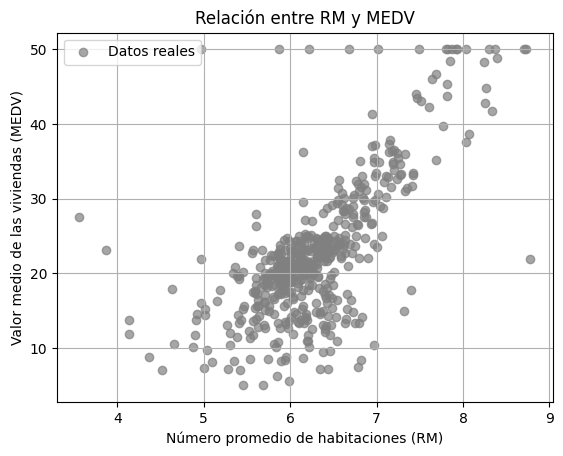

Correlación entre RM y MEDV: 0.6953599470715393


In [2]:
# --- Importar las bibliotecas necesarias ---
# pandas: Para manipulación y análisis de datos tabulares (organizados en filas y columnas).
# numpy: Para operaciones matemáticas y manejo de arrays.
# matplotlib: Para generar gráficos como scatter plots e histogramas.
# sklearn: Para entrenar y evaluar el modelo de regresión lineal.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- Cargar el Boston Housing Dataset ---
# URL donde se encuentra el dataset.
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Leer los datos desde la URL
# sep="\s+": Indica que los valores están separados por espacios.
# skiprows=22: Omite las primeras 22 filas (descripciones y metadatos).
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Procesar los datos
# Combinar las filas para crear una matriz completa de datos.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # Características
target = raw_df.values[1::2, 2]  # Variable objetivo (MEDV)

# Crear un DataFrame organizado con las características y la variable objetivo
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=columns)
df['MEDV'] = target  # Agregar la variable dependiente

# --- Relación entre RM y MEDV ---
# Graficar RM (número promedio de habitaciones) vs MEDV (valor medio de las viviendas)
plt.scatter(df['RM'], df['MEDV'], alpha=0.7, color='gray', label='Datos reales')
plt.xlabel("Número promedio de habitaciones (RM)")
plt.ylabel("Valor medio de las viviendas (MEDV)")
plt.title("Relación entre RM y MEDV")
plt.grid(True)
plt.legend()
plt.show()

# Calcular la correlación entre RM y MEDV
correlation = df['RM'].corr(df['MEDV'])
print(f"Correlación entre RM y MEDV: {correlation}")

El scatter plot muestra claramente que a medida que el número promedio de habitaciones (RM) aumenta, el valor medio de las viviendas (MEDV) tiende a incrementarse. Además el coeficiente de correlación calculado es aproximadamente 0.6954, lo que indica una relación lineal positiva moderadamente fuerte entre RM y MEDV. Esto quiere decir que un aumento en el número de habitaciones está asociado con un aumento en el valor de las viviendas.

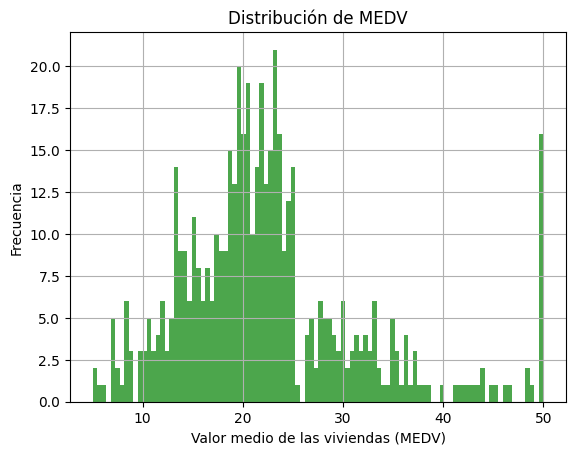

In [3]:
# --- Identificar anomalías en la distribución de MEDV ---
# Generar un histograma para MEDV con un número elevado de bins
plt.hist(df['MEDV'], bins=100, color='green', alpha=0.7)
plt.xlabel("Valor medio de las viviendas (MEDV)")
plt.ylabel("Frecuencia")
plt.title("Distribución de MEDV")
plt.grid(True)
plt.show()

## 2. Regresión Lineal simple - Minimos Cuadrados Ordinarios



Una vez hemos efectuado el análisis exploratorio inicial, vamos a proceder a implementar y entrenar a nuestro modelo.
No olvidemos que, podemos conseguir ajustar a los datos nuestra recta de regresión lineal haciendo uso de aquellos valores de los parámetros obtenidos mediante el método de ***Mínimos Cuadrados Ordinarios***. Este método encuentra que el mínimo de la función del ***Error Cuadrático Medio*** se encuentra en el punto donde su derivada es igual a 0. Esto se obtiene evaluando la siguiente expresión:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

Recuerda que para trabajar de forma vectorizada, ampliamos la matriz $X$ con una primera columna de valores asignados a $1$, que servirán para mantener al termino independiente pues... pues eso: independiente.


Coeficiente (w1 - pendiente): 9.10210898118031
Intercepto (w0): -34.67062077643857


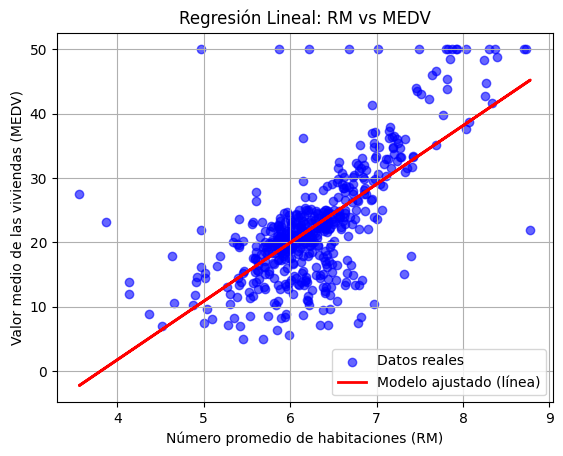

Coeficiente de determinación R^2: 0.48352545599133423
El valor medio predicho para una vivienda con 9 habitaciones es: 47.24836005418422
El número medio de habitaciones predicho para una vivienda con valor medio de 45,000$ es: 8.752984713890706
Error Cuadrático Medio (ECM): 43.60055177116956


In [27]:
# --- Modelar la relación: Regresión Lineal ---
# Seleccionar la variable independiente (RM: número promedio de habitaciones)
# y la variable dependiente (MEDV: valor medio de las viviendas).
X = df[['RM']]  # Importante: se deja X como DataFrame para mantener 2 dimensiones.
y = df['MEDV']

# Crear y ajustar el modelo de regresión lineal (mínimos cuadrados ordinarios)
model = LinearRegression()
model.fit(X, y)

# Mostrar los parámetros del modelo
# w1 (pendiente) indica el cambio en MEDV por cada unidad de cambio en RM.
# w0 (intercepto) es el valor predicho de MEDV cuando RM es 0.
print(f"Coeficiente (w1 - pendiente): {model.coef_[0]}")
print(f"Intercepto (w0): {model.intercept_}")

# Generar el vector de predicción Y_P para cada valor de X
y_pred = model.predict(X)

# Visualizar la línea de regresión junto con los datos reales
plt.scatter(X, y, color='blue', alpha=0.6, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Modelo ajustado (línea)')
plt.xlabel("Número promedio de habitaciones (RM)")
plt.ylabel("Valor medio de las viviendas (MEDV)")
plt.title("Regresión Lineal: RM vs MEDV")
plt.legend()
plt.grid(True)
plt.show()

# --- Evaluar el rendimiento del modelo ---
# Calcular el coeficiente de determinación R², que nos indica qué proporción
# de la variabilidad de MEDV se explica a partir de RM.
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación R^2: {r2}")

# --- Predicción para casos concretos ---
# 1. Predecir el valor medio de una vivienda para un número medio de 9 habitaciones.
prediccion_9 = model.predict(pd.DataFrame({'RM': [9]}))
print(f"El valor medio predicho para una vivienda con 9 habitaciones es: {prediccion_9[0]}")

# 2. Predecir el número medio de habitaciones para una vivienda cuyo valor medio es de 45,000$.
# En el dataset MEDV está en miles de dólares, por lo que 45,000$ se representa como 45.
# A partir de la ecuación de la recta: y = w0 + w1*x, despejamos x:
prediccion_RM = (45 - model.intercept_) / model.coef_[0]
print(f"El número medio de habitaciones predicho para una vivienda con valor medio de 45,000$ es: {prediccion_RM}")

# --- Calcular el Error Cuadrático Medio (ECM) ---
# Definimos una función que recibe el vector de valores reales (Y) y el vector predicho (Y_P)
# para calcular el ECM según la fórmula: ECM = (1/n) * Σ (Y_P - Y_real)^2
# Calcular el ECM directamente
ecm = np.mean((y - y_pred) ** 2)
print(f"Error Cuadrático Medio (ECM): {ecm}")


Al obtener un coeficiente de determinación del 0.48 aproximadamente, podemos decir que, el 48% de lo que cambia en el precio de la casa se puede explicar por la cantidad de habitaciones.


##3. Regresión Lineal Simple - Librería Sklearn.

Ahora haremos uso de la función sklearn.linear_model.LinearRegression() para entrenar un modelo de Regresión Lineal Simple con las mismas variables que hemos utilizado en el ejercicio anterior, para finalmente comprobar los resultados que obtendremos con los que obtuvimos anteriormente

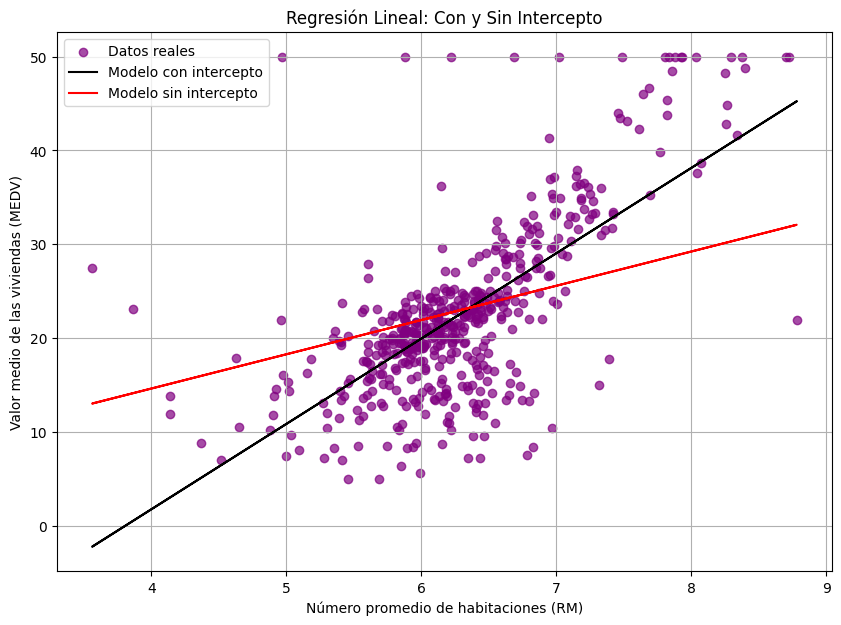

Modelo con intercepto:
  Pendiente (w1): 9.10210898118031
  Intercepto (w0): -34.67062077643857
  Error Cuadrático Medio (ECM): 43.60055177116956

Modelo sin intercepto:
  Pendiente (w1): 3.6533504000238834
  Intercepto (w0): 0.0
  Error Cuadrático Medio (ECM): 58.41063543210173


In [33]:
X = df[['RM']]  # Variable independiente
y = df['MEDV']  # Variable dependiente

# --- Entrenar los modelos de regresión lineal ---
# Modelo con intercepto (fit_intercept=True)
model_with_intercept = LinearRegression(fit_intercept=True)
model_with_intercept.fit(X, y)

# Modelo sin intercepto (fit_intercept=False)
model_without_intercept = LinearRegression(fit_intercept=False)
model_without_intercept.fit(X, y)

# --- Generar predicciones ---
# Predicciones para el modelo con intercepto
y_pred_with_intercept = model_with_intercept.predict(X)

# Predicciones para el modelo sin intercepto
y_pred_without_intercept = model_without_intercept.predict(X)

# --- Visualizar los resultados ---
plt.figure(figsize=(10, 7))
plt.scatter(X, y, alpha=0.7, label="Datos reales", color="purple")  # Datos reales
plt.plot(X, y_pred_with_intercept, label="Modelo con intercepto", color="black")  # Línea del modelo con intercepto
plt.plot(X, y_pred_without_intercept, label="Modelo sin intercepto", color="red")  # Línea del modelo sin intercepto
plt.xlabel("Número promedio de habitaciones (RM)")
plt.ylabel("Valor medio de las viviendas (MEDV)")
plt.title("Regresión Lineal: Con y Sin Intercepto")
plt.legend()
plt.grid(True)
plt.show()

# --- Calcular el Error Cuadrático Medio (ECM) ---
# ECM para el modelo con intercepto
mse_with_intercept = mean_squared_error(y, y_pred_with_intercept)

# ECM para el modelo sin intercepto
mse_without_intercept = mean_squared_error(y, y_pred_without_intercept)

# --- Imprimir los resultados ---
print("Modelo con intercepto:")
print(f"  Pendiente (w1): {model_with_intercept.coef_[0]}")
print(f"  Intercepto (w0): {model_with_intercept.intercept_}")
print(f"  Error Cuadrático Medio (ECM): {mse_with_intercept}")

print("\nModelo sin intercepto:")
print(f"  Pendiente (w1): {model_without_intercept.coef_[0]}")
print(f"  Intercepto (w0): {model_without_intercept.intercept_}")  # Será 0 en este caso
print(f"  Error Cuadrático Medio (ECM): {mse_without_intercept}")


Con los resultados obtenidos podemos corroborar que con ambas aplicaciones, obtenemos el mismo resultado. Por lo tanto concluimos que el usar la libreria "SKlearn" nos permite hacer el mismo trabajo pero de una manera más rapida.
Por otro lado, en este grafico tambien se considero un pronostico sin considerar el intercepto, por lo tanto podemos observar como es que los datos pronosticados son cada vez más inexactos.

## 4. Regresión Lineal Multiple

Por ultimo, como ya vimos, podemos llevar el modelo de Regresión Lineal Simple a otro nivel añadiendo más variables, obteniendo así un modelo de Regresión Lineal Múltiple. Al incluir más variables, le damos al modelo más información útil para afinar las predicciones. Por ejemplo, un modelo de Regresión Lineal Simple podría intentar predecir el peso de una persona usando solo su altura. Pero si añadimos otra variable, como la edad, obtendríamos un panorama más completo para hacer predicciones más acertadas.

Ahora vamos a realizar un modelo de Regresión Lineal Múltiple dónde se utilizen las variables ** RM** (Número medio de habitaciones), **LSTAT ** (Porcentaje de población en el barrio clasificada como clase baja) y **PTRATIO** (Ratio de alumno-profesor del barrio).

In [12]:
import numpy as np

# --- Seleccionar las variables independientes y dependiente ---
# Convertir las columnas seleccionadas a matrices NumPy para cálculos matemáticos
X = df[['RM', 'LSTAT', 'PTRATIO']].values  # Variables independientes
y = df['MEDV'].values  # Variable dependiente

# --- Añadir una columna de unos a X para el término independiente (w0) ---
# Esto permite que el término independiente w0 sea incluido en los cálculos
X = np.c_[np.ones(X.shape[0]), X]

# --- Calcular los coeficientes manualmente usando el método de Mínimos Cuadrados Ordinarios ---
# Fórmula: W = (X^T * X)^-1 * X^T * y
XtX = np.dot(X.T, X)  # Producto de la transpuesta de X con X
XtX_inv = np.linalg.inv(XtX)  # Inversa de (X^T * X)
Xty = np.dot(X.T, y)  # Producto de la transpuesta de X con y
W = np.dot(XtX_inv, Xty)  # Coeficientes del modelo

# Separar los coeficientes
intercept = W[0]  # w0
coefficients = W[1:]  # w1, w2, w3

# Imprimir los coeficientes
print("Modelo de Regresión Lineal Múltiple (Cálculo manual):")
print(f"  Intercepto (w0): {intercept}")
print(f"  Coeficiente para RM (w1): {coefficients[0]}")
print(f"  Coeficiente para LSTAT (w2): {coefficients[1]}")
print(f"  Coeficiente para PTRATIO (w3): {coefficients[2]}")

# --- Generar predicciones ---
# Fórmula: y_pred = X * W
y_pred = np.dot(X, W)

# --- Calcular el Error Cuadrático Medio (ECM) ---
# Fórmula del ECM: ECM = (1/n) * sum((y - y_pred)^2)
n = len(y)  # Número de observaciones
mse_manual = np.mean((y - y_pred) ** 2)

print(f"\nError Cuadrático Medio (ECM) del modelo múltiple: {mse_manual}")

# --- Comparar con el modelo de Regresión Lineal Simple ---
# Usar solo la variable RM como independiente
X_simple = df[['RM']].values  # Variable independiente
X_simple = np.c_[np.ones(X_simple.shape[0]), X_simple]  # Añadir columna de unos

# Calcular los coeficientes para el modelo simple
XtX_simple = np.dot(X_simple.T, X_simple)
XtX_simple_inv = np.linalg.inv(XtX_simple)
Xty_simple = np.dot(X_simple.T, y)
W_simple = np.dot(XtX_simple_inv, Xty_simple)

# Predicciones del modelo simple
y_pred_simple = np.dot(X_simple, W_simple)

# Calcular el ECM del modelo simple
mse_simple = np.mean((y - y_pred_simple) ** 2)

print(f"Error Cuadrático Medio (ECM) del modelo simple: {mse_simple}")

Modelo de Regresión Lineal Múltiple (Cálculo manual):
  Intercepto (w0): 18.567111505378307
  Coeficiente para RM (w1): 4.515420943857066
  Coeficiente para LSTAT (w2): -0.5718056878723949
  Coeficiente para PTRATIO (w3): -0.9307225552703358

Error Cuadrático Medio (ECM) del modelo múltiple: 27.130405758497066
Error Cuadrático Medio (ECM) del modelo simple: 43.60055177116956


De acuerdo a los resultados podemos ver que el ECM se redujo considerablemente, esto nos dice que las variables comsideradas influyen enormemnte en la variación del precio de las viviendas y que nuestras prredicciones son aun más acertadas.
Usando el modelo simple obtuvimos que el precio de las viviendas y nuestros valores pronosticados tienen una diferencia de '43600 dolares' aproximadamente, mientras que con el modelo multiple, la precisión se hizo más exacta con una diferencia de '27130 dolares' aproximadamente, que a pesar de ser una cantidad considerable, se puede ver una gran mejora de precisión.

**Ahora vamos a comprobar que el valor del Error Cuadrático Medio que hemos obtenido previamente en el ejercicio anterior es igual al que nos proporciona la función ya implementada sklearn.metrics.mean_squared_error().**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Seleccionar las variables independientes y dependiente ---
# Variables independientes: RM, LSTAT, PTRATIO
X_multiple = df[['RM', 'LSTAT', 'PTRATIO']]  # Usamos 3 variables para el modelo
y = df['MEDV']  # Variable dependiente: MEDV

# --- Entrenar el modelo ---
# Crear el modelo de Regresión Lineal Múltiple
model_multiple = LinearRegression(fit_intercept=True)
model_multiple.fit(X_multiple, y)  # Entrenar el modelo con las variables seleccionadas

# --- Observar los coeficientes ---
# Coeficientes obtenidos por el modelo
coefficients = model_multiple.coef_
intercept = model_multiple.intercept_
print("Modelo de Regresión Lineal Múltiple:")
print(f"  Intercepto (w0): {intercept}")
print(f"  Coeficiente para RM (w1): {coefficients[0]}")
print(f"  Coeficiente para LSTAT (w2): {coefficients[1]}")
print(f"  Coeficiente para PTRATIO (w3): {coefficients[2]}")

# --- Generar predicciones ---
# Calcular las predicciones del modelo múltiple
y_pred_multiple = model_multiple.predict(X_multiple)

# --- Evaluar el modelo ---
# Calcular el Error Cuadrático Medio (ECM) para el modelo múltiple
mse_multiple = mean_squared_error(y, y_pred_multiple)
print(f"Error Cuadrático Medio (ECM) del modelo múltiple: {mse_multiple}")

# --- Comparar con el modelo de Regresión Lineal Simple ---
# Entrenar el modelo de Regresión Lineal Simple (usando solo RM)
X_simple = df[['RM']]  # Variable independiente para el modelo simple
model_simple = LinearRegression(fit_intercept=True)
model_simple.fit(X_simple, y)
y_pred_simple = model_simple.predict(X_simple)

# Calcular el ECM del modelo simple
mse_simple = mean_squared_error(y, y_pred_simple)
print(f"Error Cuadrático Medio (ECM) del modelo simple: {mse_simple}")


Modelo de Regresión Lineal Múltiple:
  Intercepto (w0): 18.567111505395246
  Coeficiente para RM (w1): 4.515420943855423
  Coeficiente para LSTAT (w2): -0.5718056878724755
  Coeficiente para PTRATIO (w3): -0.9307225552706218
Error Cuadrático Medio (ECM) del modelo múltiple: 27.13040575849706
Error Cuadrático Medio (ECM) del modelo simple: 43.60055177116956


Como podemos observar, usando la función **sklearn.metrics.mean_squared_error()** Obtenemos los mismos resultados en ECM.